<a href="https://colab.research.google.com/github/saiku122/AIJobcolle/blob/master/MachineLearning/python/WORK%20for%20P02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WORK for P02

## [Work-1]  
以下の設問に答えて下さい。
###### Q1.リッジ回帰とはどのようなアルゴリズムか（OLSとの違いは）？  
①OLSにL2正則化項(L2ノルムにハイパーパラメータを乗ずる)を加え過学習の影響を防ぐためのアルゴリズム
※Lasso回帰
OLSにL1正則化項(L1ノルムを加える)

###### Q2. 過学習への対処法を４つ挙げよ。
①正則化項をくわえる  
②次元削減（特徴抽出）  
③次元削減（特徴選択）  
④ホールドアウト法　※検証  


###### Q3. ランダムフォレストのmax_depthのデフォルトはNoneとなっている。どのような決定木が生成されるか説明せよ。
Reference: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
>max_depth : integer or None, optional (default=None)  
>The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  

max_depthの値までランダムフォレストが生成される
指定しない場合、すべての枝葉がmin_samples_split以下になるまで学習を繰り返す。
　→つまり学習データに依存したモデルが構築されるので過学習を起こしやすい

##### Q4. sklearnのGradientBoostingRregressorのmax_depthのデフォルトを確認せよ。
Reference: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html  
デフォルトは3


In [45]:
! pip install dtreeviz

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 39.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=fa95f3e904995fcb5b789360c6fa1f30254556ad132c18d61a1905895e7b866a
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=2949cc2622b60416922e65a457589b1d357d3b09ed83713bd67a685768e030c7
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


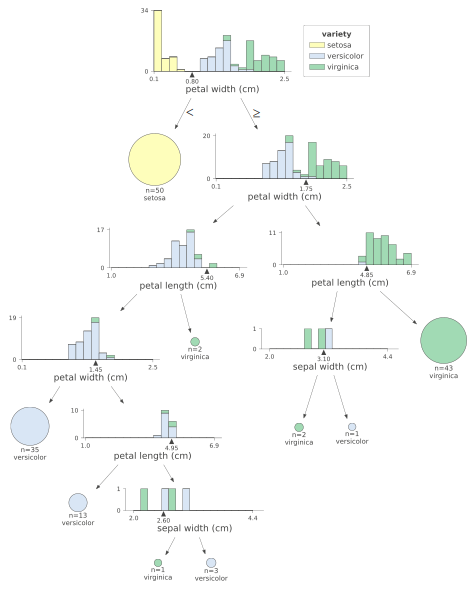

In [51]:
#テストコード
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.pipeline import Pipeline
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import dtreeviz

iris = load_iris()
"""
clf_3 = tree.DecisionTreeClassifier(max_depth=3)
clf_3 = clf_3.fit(iris.data, iris.target)

predicted = clf_3.predict(iris.data)

dot_data = StringIO()
tree.export_graphviz(clf_3, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())
"""
"""
clf_3 = RandomForestClassifier(max_depth=3, n_estimators=30, random_state=42)
clf_3=clf_3.fit(iris.data, iris.target)
#予測
predicted = clf_3.predict(iris.data)

estimators = clf_3.estimators_
viz = dtreeviz(
    estimators[0],
    iris.data, 
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
) 

viz
"""

clf_normal = RandomForestClassifier(n_estimators=30, random_state=42)
clf_normal=clf_normal.fit(iris.data, iris.target)
#予測
predicted = clf_normal.predict(iris.data)

estimators = clf_normal.estimators_
viz = dtreeviz(
    estimators[0],
    iris.data, 
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names],
) 

viz

In [39]:
!dot -T png iris_tree.dot > iris_tree.png

In [42]:
Image('iris_tree.png')

## [Work-2-1]  
以下コードを一度よく確認してから実行し、正常終了することを確認して下さい。アンサンブル学習の強さ（R2値が相対的に高い）が確認できるはずです。もちろん、このデータだけで結論を一般化はできませんが、アンサンブル学習はその汎化能力の高さから広く活用されていることを覚えておきましょう。

In [52]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# set dataframe
dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='y')

# holdout
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)
# make pipelines for modeling
pipe_ols = Pipeline([('scl',StandardScaler()),('est',LinearRegression())])
pipe_ridge = Pipeline([('scl',StandardScaler()),('est',Ridge(random_state=1))])
pipe_rf = Pipeline([('scl',StandardScaler()), ('est',RandomForestRegressor(random_state=1))])
pipe_gbr = Pipeline([('scl',StandardScaler()),('est',GradientBoostingRegressor(random_state=1))])

# build models
pipe_ols.fit(X_train, y_train)
pipe_ridge.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_gbr.fit(X_train, y_train)

# print the performance
print('R2 score of OLS: %.6f' % r2_score(y_test, pipe_ols.predict(X_test)))
print('R2 score of Ridge: %.6f' % r2_score(y_test, pipe_ridge.predict(X_test)))
print('R2 score of RandomForest: %.6f' % r2_score(y_test, pipe_rf.predict(X_test)))
print('R2 score of GradinetBoostingRegressor: %.6f' % r2_score(y_test, pipe_gbr.predict(X_test)))

R2 score of OLS: 0.589222
R2 score of Ridge: 0.588140
R2 score of RandomForest: 0.761364
R2 score of GradinetBoostingRegressor: 0.793504


## [Work-2-2]  
以下コードを完成させ（Work2-1の再現）、正常終了させよ。

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# set dataframe
dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='y')

# holdout
X_train, [----------], y_train, [----------] = train_test_split(X, y, test_size=0.20, random_state=0)

# make pipelines for modeling
pipe_ols = Pipeline([('scl',StandardScaler()),('est',[----------])])
pipe_ridge = Pipeline([('scl',StandardScaler()),('est',[----------](random_state=1))])
pipe_rf = Pipeline([('scl',StandardScaler()),('est',[----------](random_state=1))])
pipe_gbr = Pipeline([('scl',StandardScaler()),('est',[----------](random_state=1))])

# build models
pipe_ols.[----------](X_train, y_train)
pipe_ridge.[----------](X_train, y_train)
pipe_rf.[----------](X_train, y_train)
pipe_gbr.[----------](X_train, y_train)

# print the performance
print('R2 score of OLS: %.6f' % r2_score(y_test, pipe_ols.[----------](X_test)))
print('R2 score of Ridge: %.6f' % r2_score(y_test, pipe_ridge.[----------](X_test)))
print('R2 score of RandomForest: %.6f' % r2_score(y_test, pipe_rf.[----------](X_test)))
print('R2 score of GradinetBoostingRegressor: %.6f' % r2_score(y_test, pipe_gbr.[----------](X_test)))

## [Work-2-3]  
以下のコードを完成させ（Work-2-1の再現）、正常終了させよ。

In [ ]:
# import libraries
import [----------] as pd
import [----------] as np
from sklearn.datasets import load_boston
from sklearn.[----------] import Standard[----------]
from sklearn.[----------] import Linear[----------], [----------]
from sklearn.[----------] import Random[----------], Gradient[----------]
from sklearn.[----------] import train_[----------]
from sklearn.[----------] import Pipe[----------]
from sklearn.[----------] import r2_[----------]

# set dataframe
dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='y')

# holdout
[----------], [----------], y_train, [----------] = [----------](X, y, test_size=0.20, random_state=0)

# make pipelines for modeling
pipe_ols = Pipeline([('scl',[----------]),('est',[----------])])
pipe_ridge = Pipeline([('scl',[----------]),('est',[----------](random_state=1))])
pipe_rf = Pipeline([('scl',[----------]),('est',[----------](random_state=1))])
pipe_gbr = Pipeline([('scl',[----------]),('est',[----------](random_state=1))])

# build models
pipe_ols.[----------]([----------], [----------])
pipe_ridge.[----------]([----------], [----------])
pipe_rf.[----------]([----------], [----------])
pipe_gbr.[----------]([----------], [----------])

# print the performance
print('R2 score of OLS: %.6f' % r2_score(y_test, pipe_ols.[----------](X_test)))
print('R2 score of Ridge: %.6f' % r2_score(y_test, pipe_ridge.[----------](X_test)))
print('R2 score of RandomForest: %.6f' % r2_score(y_test, pipe_rf.[----------](X_test)))
print('R2 score of GradinetBoostingRegressor: %.6f' % r2_score(y_test, pipe_gbr.[----------](X_test)))

## [Work-2-4]  
以下のコードを完成させ（Work-2-1の再現）、正常終了させよ。

In [ ]:
# import libraries
import [----------] as pd
import [----------] as np
from sklearn.datasets import load_boston
from sklearn.[----------] import [----------]  #前処理
from sklearn.[----------] import [----------],[----------]  #線形モデル
from sklearn.[----------] import [----------],[----------]  #アンサンブルモデル
from sklearn.[----------] import [----------]  #holdout
from sklearn.[----------] import [----------]  #パイプライン
from sklearn.[----------] import [----------]  #R2スコア

# set dataframe
dataset = load_boston()
X = pd.[----------](dataset.data, columns=dataset.feature_names)
y = pd.[----------](dataset.target, name='y')

# holdout
[----------], [----------], [----------], [----------] = [----------](X,y,[----------]=0.20,random_state=0)

# make pipelines for modeling
pipe_ols = [----------]([('scl',[----------]),('est',[----------])])
pipe_ridge = [----------]([('scl',[----------]),('est',[----------](random_state=1))])
pipe_rf = [----------]([('scl',[----------]),('est',[----------](random_state=1))])
pipe_gbr = [----------]([('scl',[----------]),('est',[----------](random_state=1))])

# build models
pipe_ols.[----------]([----------], [----------])
pipe_ridge.[----------]([----------], [----------])
pipe_rf.[----------]([----------], [----------])
pipe_gbr.[----------]([----------], [----------])

# print the performance
print('R2 score of OLS: %.6f' % r2_score(y_test, pipe_ols.[----------](X_test)))
print('R2 score of Ridge: %.6f' % r2_score(y_test, pipe_ridge.[----------](X_test)))
print('R2 score of RandomForest: %.6f' % r2_score(y_test, pipe_rf.[----------](X_test)))
print('R2 score of GradinetBoostingRegressor: %.6f' % r2_score(y_test, pipe_gbr.[----------](X_test)))

## [Work-3-1]（Codeの分解）    
以下コードを実施し、正常終了することを確認せよ。データの読み込み、データ前処理、アルゴリズムの呼び出し、交叉検証準備、一連の処理を束ねる便利機能、評価指標の呼び出しと、モデル構築に必要な機能が網羅されていることを確認せよ。

In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

## [Work-3-2]（Codeの分解）    
サンプルデータ（dataset）の属性dataはNumpyのarray（配列型）であることを確認せよ。

In [54]:
# set dataframe
dataset = load_boston()
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## [Work-3-3]（Codeの分解）    
サンプルデータ（dataset）の属性feature_namesはNumpyのarray（配列型）であることを確認せよ。

In [55]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## [Work-3-4]（Codeの分解）    
特徴量ベクトル（dataset.data）とカラム名（dataset.feature_names）からデータフレームが構成されることを確認せよ。

In [56]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## [Work-3-5]（Codeの分解）  
正解データがdatasetオブジェクトの属性targetでNumpyのarray型で格納されていることを確認せよ。

In [57]:
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## [Work-3-6]（Codeの分解）  
正解データをカラム名"y"でシリーズ化していることを確認せよ。

In [58]:
y = pd.Series(dataset.target, name='y')
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: y, dtype: float64

## [Work-3-7]（Codeの分解）  
train_test_split関数によって、Xとyが80%:20%に分割されていることを確認せよ。

In [59]:
# cross-validation(holdout)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# print the shape
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(506, 13)
(404, 13)
(102, 13)


## [Work-3-8]（Codeの分解）  
パイプラインの構成要素をnamed_stepsで呼び出さることを確認せよ。  
StandardScalerは学習データの各変数（縦方向）の平均と標準偏差を記憶し標準化するためのライブラリである。

In [60]:
# make pipelines for modeling
pipe_ridge = Pipeline([('scl',StandardScaler()),('est',Ridge())])
pipe_gbr = Pipeline([('scl',StandardScaler()),('est',GradientBoostingRegressor(random_state=1))])

# get pipeline elements
pipe_ridge.named_steps['scl']

StandardScaler(copy=True, with_mean=True, with_std=True)

## [Work-3-9]（Codeの分解）  
パイプラインの構成要素をnamed_stepsで呼び出さることを確認せよ。  
呼び出されたリッジ回帰のパラメータalphaが正則化項の重みであることを思い出すこと。

In [61]:
# get pipeline elements
pipe_ridge.named_steps['est']

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## [Work-3-10]（Codeの分解）  
以下のコードを実行し、パイプラインの構成要素をnamed_stepsで呼び出さることを確認せよ。呼び出された勾配ブースティングのパラメータn_estimators=100は決定木を100本直列で学習させるということである。パラメータmax_depth=3は各決定木の深さである。またrandome_stateが指定した値であることも確認せよ。

In [62]:
# get pipeline elements
pipe_gbr.named_steps['est']

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

また以下パラメータについて、以下のイメージが持てるか確認しましょう。
- n_estimatorsを大きくすると過学習の危険性が増える
- max_depthを大きくすると過学習の危険性が増える
- random_stateを指定しないと同じモデルを再現できなくなる

## [Work-3-11]（Codeの分解）  
r2_score(正解ベクトル, 予測ベクトル)でR2値が取得できることを確認せよ。

In [63]:
print(r2_score(y_test, pipe_ridge.predict(X_test)))
print(r2_score(y_test, pipe_gbr.predict(X_test)))

NotFittedError: ignored